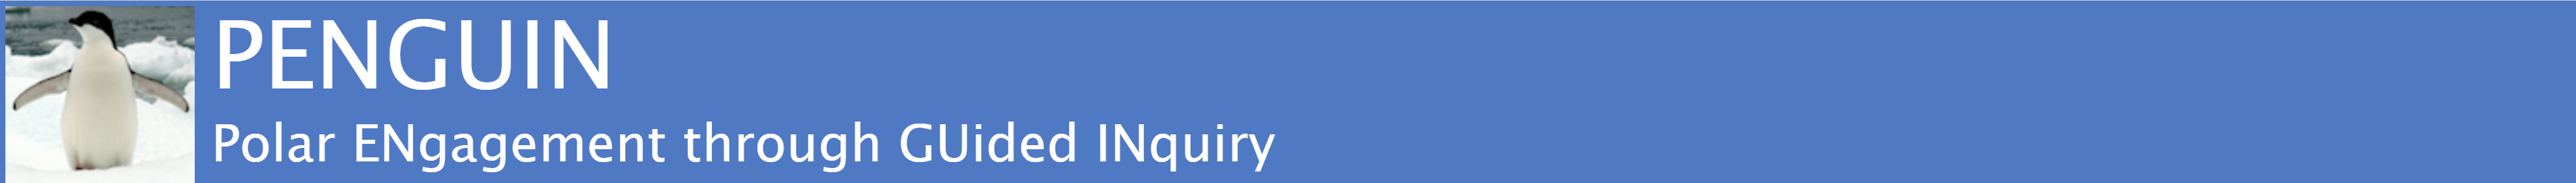

# Processing Arctic Images - 1. Arctic sea ice images
Created by Haiyan Cheng, Penny Rowe, and Steven Neshyba, with help from Daniel Neshyba-Rowe

### Learning Objectives
1. Learn about images of Arctic sea ice taken by the MODIS instrument.
2. Examine annual and long-term trends in Arctic and Antarctic sea ice.
4. Apply colormaps to an image.
5. Learn how images are stored and represented in Python and how to load, resize (crop), and save an image.
6. Learn how to convert a color image to a black and white image and how to extract the red, green, and blue components from an image.

### Pre-class activities
1. Read the Introduction (stop at Part I).
2. Go to the MODIS website, read about the MODIS instrument, and examine some of the images.
3. Bookmark your favorite image.
4. Define the terms anthropogenic, albedo, and positive feedback.
5. Describe two ways of representing images.



### Introduction

_Climate connection_  
Man-made, or _anthropogenic_ climate change is leading to increases in Earth's average global temperature. The polar regions are particularly sensitive to warming for a variety of reasons. Chief among these is the *ice-albedo feedback*. Ice is highly reflective, reflecting about 80% of the sunglight that hits it. This reflectivity is referred to as *albedo*, and the fact that ice has a high albedo helps keep it cool. As anthropogenic warming causes sea ice melt, the underlying ocean is exposed. The albedo of the ocean is quite low, and the ocean absorbs 90% of the sunlight hitting it. Thus, the more sea ice melts, the more sunlight is absorbed, further accelerating warming. A process such as this is known as a _positive feedback_. 

Arctic sea ice extent varies over the course of each year, reaching a minimum in September. Measured in September, Arctic sea ice is declining at a rate of 13.3% per decade, with serious consequences for people and animals. Perhaps the most well-known negative consequence is the reduction in habitat for polar bears, who rely on sea ice for hunting. However, there are a variety of other impacts, including sea level rise, changes in ocean circulation, changes in winter weather patterns, melting of permafrost, damage to Arctic habitat, and the opening of the NorthWest passage. 


Polar connection: the MODIS instrument

The Moderate Resolution Imaging Spectrometer (MODIS) instrument is part of NASA's Earth Observing System. MODIS instruments on two satellites image the entire Earth every 1 to 2 days. MODIS has a viewing swath width of 2,330 km, imaging Earth at 3 spatial resolutions, in 36 spectral bands. These spectral bands include 645, 555, and 469 nanometers, corresponding to red, green, and blue light, allowing the creation of color images such as our eyes see. The other spectral bands include the thermal infrared. As part of the pre-class activities, read about MODIS here: https://modis.gsfc.nasa.gov/about/ and here: https://modis.gsfc.nasa.gov/about/media/modis_brochure.pdf.

The gif animation below shows an iceberg breaking off from the Pine Island Glacier in Antarctica in November 2018. This gif animation is made up a series of MODIS images.

<p style ='text-align: center'>
<img src="https://people.nwra.com/rowe/public/penguin/IceImages/nasa-worldview-2019-01-08_to_2019-01-31.gif" height="600" width="600">
</p> 


You can check out the Pine Glacier animation [here](https://worldview.earthdata.nasa.gov/?v=-6548760.689459326,-3729582.9574279566,6665013.995706096,3168081.0425720434&p=antarctic&t=2018-11-06-T00%3A00%3A00Z&l=Coastlines,VIIRS_SNPP_CorrectedReflectance_TrueColor(hidden),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor&tr=pine_island_glacier_icebergb46_nov_2018). Clicking the link will cause the page to open in a new tab in your browser. Follow the directions in the blue square in the lower right. After you've completed the four steps, if you find the movie too fast to follow, you can click through frame-by-frame to watch the break up. Later you will download a satellite image to use in image processing.

_Computer science connection_  
In this module we learn about image representation, including black and white images, color images, and color maps. Following that, we will learn basic image representation.

<b><u>Black-and-white Images</u></b>  
An image can be represented by individual dots. The dots are called picture elements (_pixels_). In Python, an image is represented as a matrix. Each element in the matrix corresponds to a pixel in the image. Each pixel of a black-and-white image stores the appropriate amount of "grayness."

The image below is a 681-by-1024 array of pixels. In Python, it is represented by a matrix of size $681 \times 1024$, where the matrix element $[i, j]$ shows the grayness of the pixel $[i, j]$. Notice that there is a difference between the regular coordinate system and the matrix representation. In the Python~representation, the rows and columns start from index $[0, 0]$ using top-down and left-right directions. The level of grayness is represented by integers from 0 to 255, with 0 corresponding to black and 255 corresponding to white. 

Python has a data type *uint8* to store pixel values. The uint8 is a 1-byte, unsigned integer format which is more economical than the 8-byte double format which supports floating-point arithmetic. 

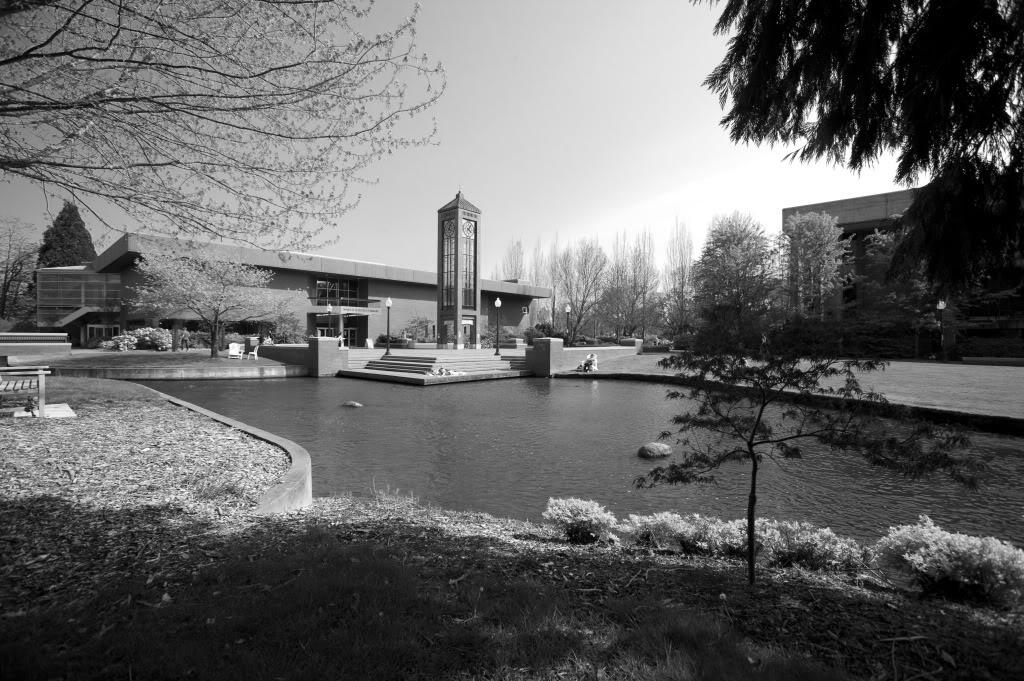Figure 1. A Black-and-White Picture is a Matrix in Python. (Modified from image courtesy of Willamette).




<b><u>Color Images</u></b>  
There are two different methods to represent color images in Python: _truecolor_ and _colormap indexed_. The truecolor images are generated by digital cameras and are widely used in computer graphics. The indexed images are often used to display scientific and engineering data with an associated color scale representing the data units. 

In a truecolor image, a particular pixel stores the RGB color for that pixel. So instead of one entry for the "grayness" in the black-and-white image, three entries are needed to store the "redness", "greenness", and "blueness". In a sense, a color image a three-dimensional array of size M-by-N-by-3, or three matrices of the same size M-by-N, representing its RGB colors, as shown in Figure 2. 

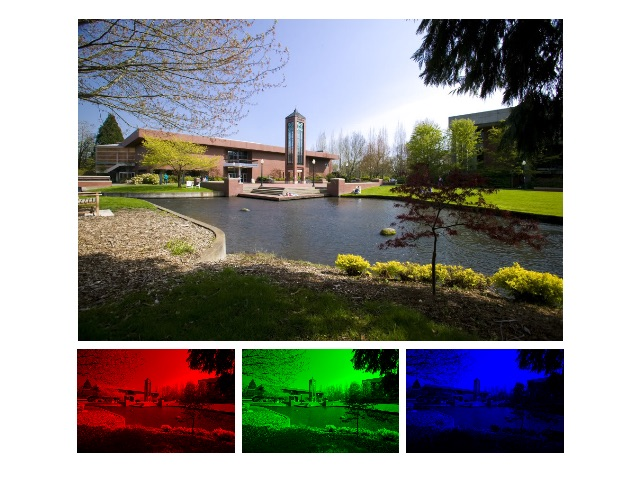Figure 2. A Truecolor Image is a 3-D Matrix in Python. (Modified from image courtesy of Willamette).

The other method to represent the color is to index into a *colormap*: the index is an integer that maps to a row in a color map matrix. The color map itself stores the red, green, and blue components in three separate columns. 

<b><u>Image manipulations</u></b>  
The basic image manipulations in Python involve reading the image into Python, checking image size, choosing a smaller area to create a smaller image, and extracting the red, green and blue components of the original image.



### Part 1. Downloading your favorite Arctic image to your computer

View images of the Arctic taken from the MODIS and other instruments [here](https://worldview.earthdata.nasa.gov/?v=-7352320,-3837952,7352320,3837952&p=arctic&t=2019-01-31-T00%3A00%3A00Z&l=Coastlines(hidden),VIIRS_SNPP_CorrectedReflectance_TrueColor(hidden),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor).

- This is a view of the North Pole. (You can click on the globe in the upper right to get views of Antarctica or other locations (Geographic). For now, let's stick with the Arctic.)
- You may notice a black circle in the middle of the image. This is a region the satellite did not pass over. The size of this region will vary with time.
- Try clicking on the timeline at the bottom and changing the date with the calendar at the lower right to look at different images.  
- Find an image that looks interesting to you. You may wish to choose an image from the summer months, when there is less snow and ice and so you can see different colors on the surface. You can also find a time when the black circle is small or absent.  
- Select your image by clicking the camera in the upper right. A box appears on the image. Move and resize it to include the area of interest to you.  
- Notice that in the upper right you have the option to change the resolution, given as km per pixel. You can keep this at 5 km per pixel.
- Click Download in the upper right. The image may open in a new browser. Right-click the image, name it "myImage.jpg" and save it to your computer.
- Find the downloaded image on your computer.  
- This is an example of a true-color image (although it may have some corrections and image processing done). You can get a false-color image, which shows bands of electromagnetic radiation (light) that we can't see. Click the red "Add layers" button in the lower left.

## Part 1. Loading and Displaying an Image

In [2]:
# Following are the modules we will need.
import os
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imageio
from PIL import Image


Hopefully you successfully uploaded an image to use in this notebook. To see the contents of your directory, run the following line of code.

In [3]:
# .. See the data you have available:
os.listdir('../input/')

['august9_arctic_worldview_500mres.jpg',
 'IceImage.jpg',
 'IceImage2.jpg',
 'my-images',
 'myIceImage.jpg',
 'N_198111_extn_v2.1_edited.png',
 'WillametteMap',
 'WillametteMapInd',
 'Willamette_colors.png',
 'Willamette_colors2.png']

You should see a directory that was already there, called 'arctic-ice-images-data'. In addition, you should see the directory you created, called 'my-images'. (If you do not, then something went wrong with your upload. You can ask your instructory for help on that later. For now, you can skip comment out the commands on the next two cells).

In [4]:
# .. Examine what is in the folder you created, 'my-images'
os.listdir('../input/my-images')     

['phytoplankton_bloom_bering_sea_09-04-2014.jpg']

In [5]:
# .. Read in your image of the Arctic. Note that nothing is displayed 
#    in this step.
myimage = imageio.imread('../input/my-images/phytoplankton_bloom_bering_sea_09-04-2014.jpg') 


C:\Users\Max-PC\AppData\Local\Temp\ipykernel_23244\201628729.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  myimage = imageio.imread('../input/my-images/phytoplankton_bloom_bering_sea_09-04-2014.jpg')


If you had to comment out the previous code because you did not successfully upload your image, then uncomment and run the two lines of code in the following:

In [6]:
## .. If you did not successfully upload an image, you can use 'myIceImage.jpg', 
##    located here:
#os.listdir('../input/arctic-ice-images-data/')
#myimage = imageio.imread('../input/arctic-ice-images-data/myIceImage.jpg')

Check the dimensions (shape) and the type (dtype) of the image.

In [7]:
print(myimage.shape, myimage.dtype)

(299, 249, 3) uint8


Show the image.

(-0.5, 248.5, 298.5, -0.5)

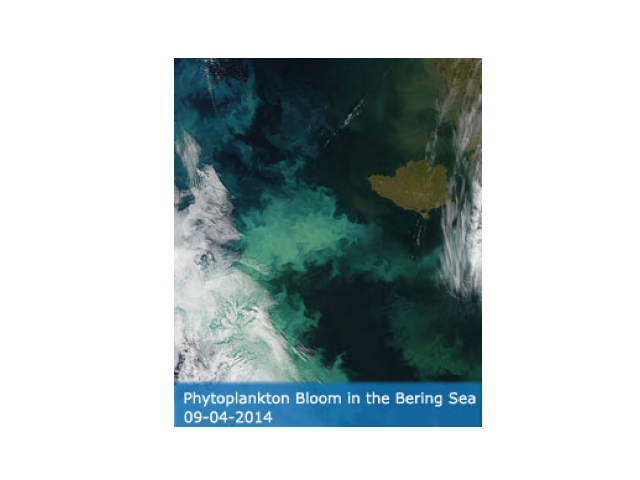

In [12]:
%matplotlib notebook

plt.figure()
plt.imshow(myimage)
plt.axis('off')     # Remove axis ticks and numbers
plt.axis('image')   # Set aspect ratio to obtain square pixels.

### Pause for analysis 1

Looking at the image above, try to distinguish between land, ocean, shadow, sea ice, snow, and cloud. For what parts of the image do you believe you can distinguish between sea ice, snow, and cloud and what techniques do you use (e.g. I assume a swirling feature is a cloud). Record your ideas in your notebook.
    

### Test your skill 1

Load in "IceImage2.jpg" from the folder "arctic-ice-images-data", giving it a unique name. Check the dimensions and type, then plot it. 

In [ ]:
# Load in "IceImage2.jpg" from the folder "arctic-ice-images-data"
iceimage = imageio.imread('../input/arctic-ice-images-data/IceImage2.jpg')

In [ ]:
# Check the image dimensions and the data type
print(iceimage.shape, iceimage.dtype)

In [ ]:
# Plot it

## Part 2. Examining annual and long-term trends in Arctic sea ice. 

The Sea Ice Animation Toool is provided by the National Snow and Ice Data Center (NSIDC). These images, created using a satellite microwave sensor, do not have any cloud contamination. Go to the website https://nsidc.org/data/. The third column says, "Data For Everyone." In that column, choose "Sea Ice Index."  On the left, click on "Animate Monthly Images."  

Select 2016 as the start year and play the movie to see the sea ice change over the course of a year. In what month is the sea ice at a maximum?  a minimum?  

The seasonal cycle makes it difficult to see trends over the years.  Next, select 1979 as the start year and replay the movie. (Note: you can move forward year-by-year by pressing pause and then advancing with the >| button.)

To see the trends over time, we look only at the month of September, when the sea ice is a minimum for the year. Select 1979 as the start year, select September as the start month, and click on Fixed Month Animation. Play the movie to see the long term trends in sea ice decline. 

(Optional) Repeat the above for the Antarctic by selecting "Southern" for Hemisphere. Note that the Antarctic sea ice is a minimum in a different month.


### Pause for Analysis 2: 

The images shown in this animation are much simpler than the MODIS image. At the bottom of each image, the total sea ice extent is given in millions of square miles. How might you use image processing to compare sea ice extent year to year?

## Part 3. Colormaps

The following example shows the current colormap (default name is viridis). We set the map to be a list giving the colors in the colormap viridis. Then we print the length of the list (how many colors there are in the colormap). Each item within the list is a color, represented by three numbers. Each set of numbers is contained within brackets. We can print the first three colors by indexing map.

In [ ]:
# Viridis colormap
map = matplotlib.cm.viridis.colors
print(len(map))
print(map[:3])

Now we'll look at a picture of Willamette, shown below.

In [ ]:
willamette_color_image = imageio.imread('../input/arctic-ice-images-data/Willamette_colors2.png')

plt.figure()
plt.imshow(willamette_color_image)
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels 


The following Python code loads another version of the Willamette image, this time as a matrix of colormap indices that correspond to a particular colormap. The code loads in the colormap, and the image is displayed using the indices to this colormap.

In [ ]:
%matplotlib notebook

# Load matrix of indices for Willamette colormap image
X = np.loadtxt('../input/arctic-ice-images-data/WillametteMapInd')
mmap = np.loadtxt('../input/arctic-ice-images-data/WillametteMap')

In [ ]:
print(np.shape(X))
print(np.shape(mmap))

X is a an image that is represented as an array of size 681 x 1024. Thus there are 697,344 pixels.  

mmap is a list of RGB colors: one number is used to specify the amount of red, one for the amount of green, and one for the amount of blue. It therefore consists of sets of 3. There are 32 sets of 3, and therefore 32 unique colors.


In [ ]:
print(X)
print(np.max(X))

X includes an index to mmap for each pixel. The largest value in X is 31, because there are 32 colors (remember we also include 0).

Somehow this broke ... used to work but doesn't now. Looking into fix.

In [ ]:
# .. Set the colormap
thismap = list(zip(mmap[:,0], mmap[:,1], mmap[:,2]))
TCmap = matplotlib.colors.ListedColormap(thismap)

# Plot the figure for the custom colormap side-by-side with the orginal
fig = plt.figure(figsize = (12,4))
plt.subplot(121)
plt.imshow(X, interpolation='none', cmap = plt.get_cmap(TCmap))
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels (mb, check matplotlib document)

plt.subplot(122)
plt.imshow(willamette_color_image)
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels (mb, check matplotlib document)

fig.tight_layout()

There are also built-in colormaps. Below we experiment with them.

### Test your skill
Try changing the colormap. Run the cell below and watch how it changes the figure above. Replace "jet" with one of the other maps (e.g. viridis, hot, cool, bone, copper, pink, jet, prism, flag) and re-run the cell to see the effect.

In [ ]:
fig = plt.figure()

# .. Change 'jet' in the code below to try out different colormaps
#    Colormaps include: viridis, hot, cool, bone
#    copper, pink, jet, prism, flag, etc.
plt.subplot(2,2,1)
plt.imshow(X, cmap = plt.get_cmap('jet'))   
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels (mb, check matplotlib document)

plt.subplot(2,2,2)
plt.imshow(X, cmap = plt.get_cmap('jet'))   
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels (mb, check matplotlib document)

plt.subplot(2,2,3)
plt.imshow(X, cmap = plt.get_cmap('jet'))   
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels (mb, check matplotlib document)

plt.subplot(2,2,4)
plt.imshow(X, cmap = plt.get_cmap('jet'))   
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels (mb, check matplotlib document)


### Next we will work with a MODIS image of the NorthWest passage.

In [1]:
# Read in the image and save it to a variable. 
arctic = imageio.imread('../input/arctic-ice-images-data/august9_arctic_worldview_500mres.jpg')

# Show the image
plt.figure()
plt.imshow(arctic)

NameError: name 'imageio' is not defined

In [ ]:
# Check the size of the image. Here we examine including the dimensions (shape) and the type of the data.
print (arctic.shape, arctic.dtype)

In [ ]:
# Crop the image. We will focus on the region showing the NorthWest Passage.
arctic_crop = arctic[1900:5100, 3300:8100]
plt.figure()
plt.imshow(arctic_crop)

In [ ]:
# Print the dimensions of arctic_crop, and the zeroth set of numbers in the 3rd dimension. 
print(arctic_crop.shape)
print(arctic_crop[0,0,:])


In the cells below, the red component is extracted and plotted. Note in the cell above that arctic_crop is 3-dimensional. Furthermore, the 3rd dimension has 3 possibilities. For the zeroth index, these are printed out above. These correspond to red, green and blue color components. Below we separate out the red component. First we make a copy of the variable, arctic_crop, and call it "red". We use what is called a "deepcopy." Next, we set the values to zero for the third dimension for indices 1 and 2. Now only values for the zeroth index are non-zero. These correspond to red. Plotting the matrix shows that only red color exists.


In [ ]:
# 2.1.5. Extract the red components and plot it.
red = copy.deepcopy(arctic_crop)     # "deepcopy" the matrix
red[:,:,1] = 0   # set all values to zero for index 1 of the 3rd dimension
red[:,:,2] = 0   # set all values to zero for index 2 of the 3rd dimension

# Plot the red components
plt.figure()
plt.imshow(red)
plt.axis('off')


### Try your skill 1: Extract and plot color components.  
Use the cell below to extract and plot the blue and green components in the cell that follows it.

In [ ]:
# Repeat the above for the blue components. 
# Use trial and error if you aren't sure which indices to set to zero.


In [ ]:
# Repeat the above for the green components. 
# Use trial and error if you aren't sure which indices to set to zero.



In [ ]:
# (Advanced) Finish the code below to create a 2x2 set of subplots of the original image 
#  and the red, green and blue components.
plt.figure()
plt.subplot(221)
plt.imshow(arctic_crop); plt.axis('off')

plt.subplot(22
plt.imshow(red); plt.axis('off')

plt.subplot(

plt.subplot(224)


In the cell below, we attempt to plot a grayscale version. However, the colormap 'gray' doesn't actually produce a gray plot! First we have to scale the red, green, and blue by the factors 0.299, 0.587, and 0.114. This is done in the following cell.

In [ ]:
# Try to use the gray colormap to make a grayscale plot.
plt.figure()
plt.imshow(arctic_crop, cmap = 'gray'); plt.axis('off')

In [ ]:
# First scale the red, green, and blue components, and then plot it with grayscale.
gray = 0.299 * arctic_crop[:,:,0] + 0.587 * arctic_crop[:,:,1] + 0.114 * arctic_crop[:,:,2]

plt.figure()
plt.imshow(gray, cmap = 'gray'); plt.axis('off')

### Pause for analysis
If you plot "gray" below with another colormap, do you think it will come out black and white, or with colors? Try it in the cell below. Print out some elements of the matrix "gray" and discuss the results with your neighbor. 

In [ ]:
plt.figure()
plt.imshow(gray, cmap = 'jet'); plt.axis('off')

In [Arctic Ice Images 2](https://www.kaggle.com/pennyrowe/arctic-ice-images-2) we will apply some image processing techniques to images of Arctic ice.

<img src="https://www.nsf.gov/images/logos/NSF_4-Color_bitmap_Logo.png" height="100" width="100" align="left" style="vertical-align:bottom;margin:0 px 20px"/>  This PENGUIN module was created with funding from the National Science Foundation. Creative Commons Copyright. You may freely use and share with attribution to the PENGUIN project as follows:  

Rowe, P.M. et al (2020): Integrating polar research into undergraduate curricula using computational guided inquiry, Journal of Geoscience Education, 
https://doi.org/10.1080/10899995.2020.1768004.

### For more on Processing Images of Arctic Ice, click a link below:
<font size="4">[Arctic Ice Images - 1. Arctic sea ice images (this notebook)](https://www.kaggle.com/pennyrowe/arctic-ice-images-1)  
[Arctic Ice Images - 2. Image Repair and Edge Detection](https://www.kaggle.com/pennyrowe/arctic-ice-images-2)  
[Arctic Ice Images - 3. Scene Identification](https://www.kaggle.com/pennyrowe/arctic-ice-images-3)  </font>

### Check out other PENGUIN Modules on Kaggle

<font size="4">[Processing Images of Arctic Ice](https://www.kaggle.com/pennyrowe/arctic-ice-images-1)</font>  
Satellites capture images of the globe continuously, providing a changing view of Earth's surface. These images reveal land cover and allow tracking events like hurricanes and fires. This module explores image processing of satellite images in polar regions. The module starts with exploring how images are loaded, plotted, and stored; how they can be manipulated to produce true and false-color and black and white images; and color mapping. Activites also include edge detection, noise removal, determining snow and sea ice extent, and scene identification. 

<font size="4">[Ice Cores and Climate Change](https://www.kaggle.com/pennyrowe/ice-cores)</font>  
As snow accumulates onto ice sheets over hundreds or thousands of years, air bubbles are trapped as the snow is compressed into firn and then ice. Ice cores serve as recorders of past climate and atmospheric concentration. In this module, work with data from ice cores from the East Antarctic Ice Sheet and Greenland, in order to explore earth's past climate and glacial cycles. Explore how temperature and CO$_2$ vary over the last 425,000 years, and how this is linked to changes in Earth's orbit.

<font size="4">[Penguin Population Trends](https://www.kaggle.com/pennyrowe/penguin-populations)</font>  
Adélie, chinstrap, and gentoo penguins are three species of penguins that inhabit the Antarctic Peninsula. Although these species are closely related and may live side-by-side, they have varying ranges and diets, and changes in the Antarctic ecosystem are affecting them very differently. Learn about these penguins species and explore population trends.  
</font>  

<font size="4">[Permafrost](https://www.kaggle.com/pennyrowe/permafrost)</font>  
Learn what permafrost is, the implications of permafrost thawing due to climate change, and how to calculate heat diffusion through permafrost. Activities include watching a video about permafrost, checking out a journal article, and downloading, plotting and analyzing permafrost data. Learn how permafrost temperature changes with depth underground, seasonally, and annually, and calculate heat flow through permafrost.

<font size="4">[Polar Spectra](https://www.kaggle.com/pennyrowe/polar-spectra-1)</font>  
Learn about the greenhouse effect by examining a "forbidden" rovibrational band in the infrared emission spectra of Earth's atmosphere, recorded from the surface at South Pole Station. By weighting rotational energy degeneracies with a Boltzmann factor, you can simulate the R-branch of the band - the result is a rudimentary estimate of the average temperature of the troposphere above the South Pole. Finally, try a second method of estimating the near-surface temperature, through matching South Polar radiative emission to a Planck Blackbody Spectrum. 

<font size="4">[Seasonal Arctic Ice Melt](https://www.kaggle.com/pennyrowe/sea-ice-melt-1)</font>  
Learn about thermodynamics topics through calculation of the amount of heat required to melt Arctic sea ice. Watch an online animation of changing polar ice with time, downloading data of Arctic ice extent and volume. Activities include using thermodynamic principles and equations to plot the phase diagram of water, find the freezing point depression of Arctic sea ice in equilibrium with sea water, and compute the change in the enthalpy of fusion of water resulting from that temperature depression.
